# **금융 머신러닝 기말 프로젝트**

20200628 강석민
- 기존 연구 사례 벤치마크 : https://github.com/ajitmane36/Bank-Marketing-Effectiveness-Prediction-ML-Classification

## **<u>데이터 구성</u>**

- age :	고객의 나이
- job :	직업(blue-collar, services 등)
- marital : 결혼 상태(married, single 등)
- education :	교육 수준(primary, secondary, tertiary 등)
- default	: 신용불량 여부(기본적으로 대출 상환 불이행 여부)
- balance :	계좌 잔고(유로화)
- housing :	주택담보대출 보유 여부
- loan :	개인대출 보유 여부
- call_duration :	이번 통화의 길이(초 단위)
- campaign : 이번 캠페인 기간 동안 이 고객에게 연락한 횟수
- prev_call :	이전 캠페인에서 이 고객과의 연락 횟수
- prev_outcome :	이전 캠페인 결과(success, failure, unknown 등)
- target :	이번 캠페인에서 예금 상품 가입 여부(yes/no)

In [ ]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터셋 불러오기
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/dataset/marketing_train.csv", sep =",")
df.head()

,age,job,marital,education,default,balance,housing,loan,call_duration,campaign,prev_call,prev_outcome,target
0,40,blue-collar,married,secondary,no,580,yes,no,192,1,0,unknown,no
1,47,services,single,secondary,no,3644,no,no,83,2,0,unknown,no
2,25,student,single,tertiary,no,536,yes,no,226,1,0,unknown,no
3,42,management,married,tertiary,no,1773,no,no,311,1,1,failure,no
4,56,management,married,tertiary,no,217,no,yes,121,2,0,unknown,no


In [ ]:
# 데이터 속성이름
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'call_duration', 'campaign', 'prev_call', 'prev_outcome',
       'target'],
      dtype='object')

In [ ]:
# 데이터 자료형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            36000 non-null  int64 
 1   job            36000 non-null  object
 2   marital        36000 non-null  object
 3   education      36000 non-null  object
 4   default        36000 non-null  object
 5   balance        36000 non-null  int64 
 6   housing        36000 non-null  object
 7   loan           36000 non-null  object
 8   call_duration  36000 non-null  int64 
 9   campaign       36000 non-null  int64 
 10  prev_call      36000 non-null  int64 
 11  prev_outcome   36000 non-null  object
 12  target         36000 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.6+ MB


In [ ]:
# 데이터 기초 통계 정보
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,call_duration,campaign,prev_call,prev_outcome,target
count,36000.000000,36000,36000,36000,36000,36000.000000,36000,36000,36000.000000,36000.000000,36000.000000,36000,36000
unique,NaN,12,3,4,2,NaN,2,2,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,NaN,NaN,unknown,no
freq,NaN,7771,21622,18454,35361,NaN,20008,30183,NaN,NaN,NaN,29382,31789
mean,40.889611,NaN,NaN,NaN,NaN,1358.987083,NaN,NaN,257.567111,2.757917,0.586500,NaN,NaN
std,10.626696,NaN,NaN,NaN,NaN,3041.211966,NaN,NaN,255.730398,3.086650,2.412171,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,103.000000,1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,446.000000,NaN,NaN,180.000000,2.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.250000,NaN,NaN,318.000000,3.000000,0.000000,NaN,NaN


In [ ]:
# 범주형 변수 찾기
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('범주형 변수의 수 :',len(categorical_variables))
print('--'*45)
print(categorical_variables)

범주형 변수의 수 : 8
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'prev_outcome', 'target']


In [ ]:
# 숫자형 속성 찾기
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('숫자형 변수의 수 :',len(numerical_variables))
print('--'*45)
print(numerical_variables)

숫자형 변수의 수 : 5
------------------------------------------------------------------------------------------
['age', 'balance', 'call_duration', 'campaign', 'prev_call']


In [ ]:
# 데이터에서 중복값 확인
count_duplicated = df.duplicated().sum()
print(f'중복 개체 수: {count_duplicated}')

중복 개체 수: 0


In [ ]:
# 데이터에서 결측치 확인
count_null_df=pd.DataFrame({'속성':df.columns,'결측치 수':df.isna().sum()})
count_null_df.set_index('속성').sort_values(by='결측치 수', ascending = False)

,결측치 수
속성,
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
call_duration,0


<b><u>관찰 결과 :</u></b>
- **36000 개체에 대한 13개의 속성이 있음.**
- **object형 밎 int64 자료형으로 구성되어 있음.**
- **복제된 값 없음.**
- **결측치 없음.**

.

## **<u>데이터 분석</u>**

####  <u> 히트맵</u>

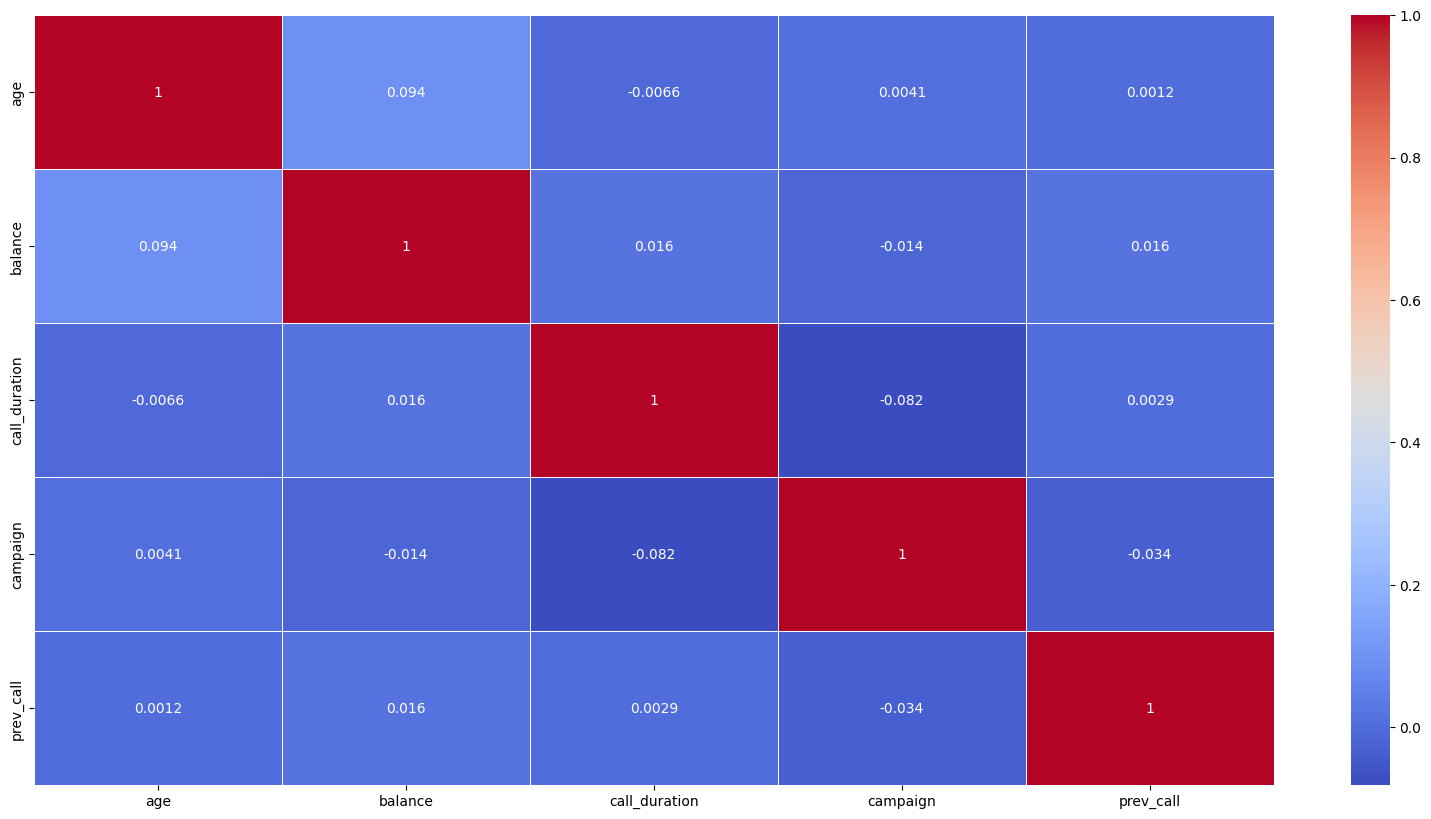

In [ ]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
df_numerical = df.select_dtypes(include=np.number)

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_numerical.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

**<u>관찰 결과 :</u>**
- 독립변수간 상관관계 나타나지 않음


.

## **<u>데이터 전처리</u>**

#### **[1] <u> 결측치 처리</u>**

In [ ]:
# unknown 값을 결측치로 간주 (null 로 변경)
df = df.replace('unknown', np.nan)

In [ ]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
prev_outcome,29382,81.62
education,1472,4.09
job,227,0.63
marital,0,0.00
age,0,0.00
default,0,0.00
balance,0,0.00
loan,0,0.00
housing,0,0.00


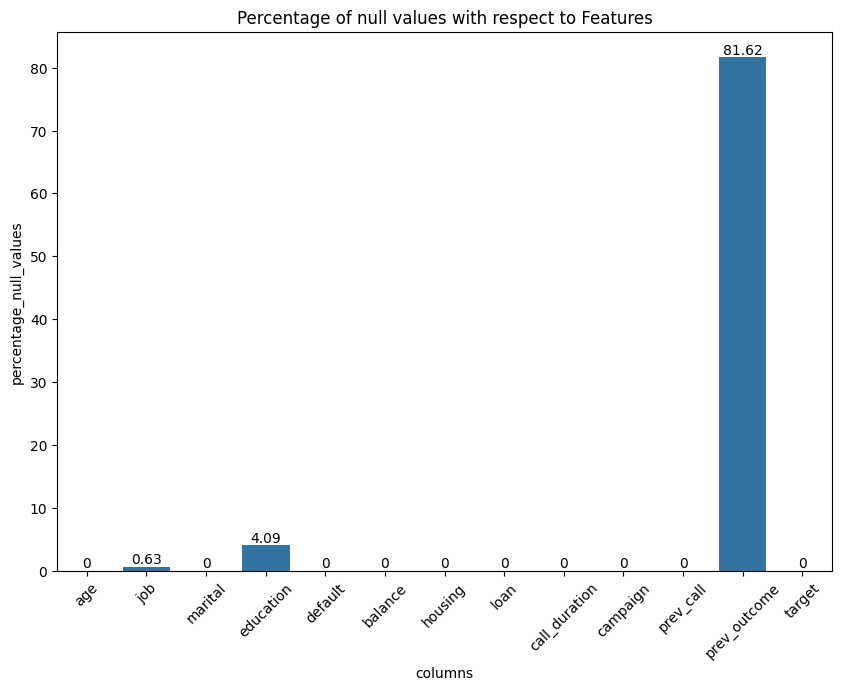

In [ ]:
# 각 속성 결측 비율 시각화
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=count_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

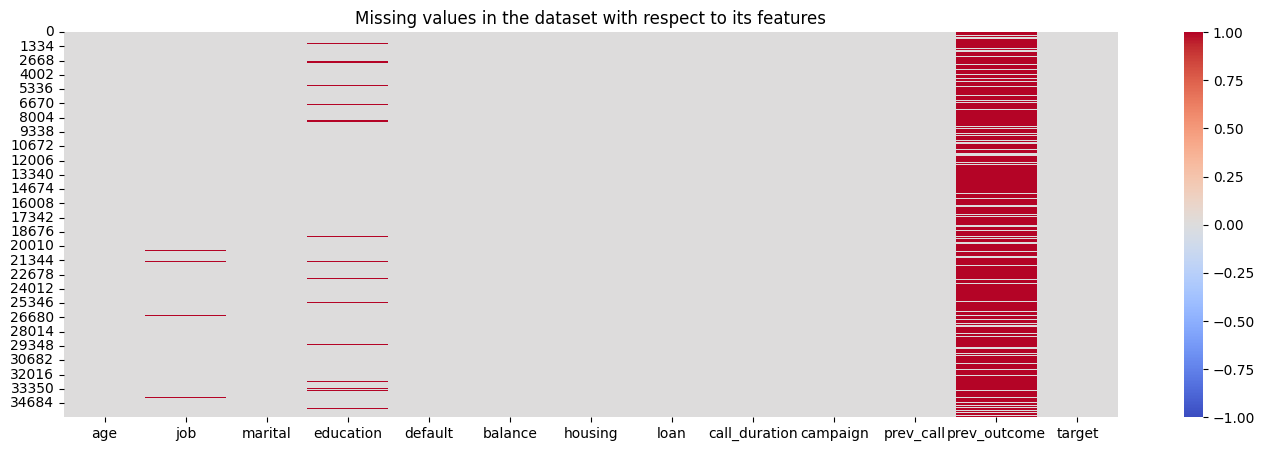

In [ ]:
# 각 속성 결측 위치 시각화
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.title('Missing values in the dataset with respect to its features')

In [ ]:
# 결측 비율이 50% 초과하는 속성 제거
df.drop(columns='prev_outcome', inplace=True)

# 결측치를 최빈값으로 대체
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [ ]:
# 결측치 처리 검증
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
call_duration,0
campaign,0


- education, job 에서 "unknown" 값은 결측치로 간주할 수 있음. 이를 최빈값으로 대체함
- prev_outcome 처럼 결측 비율이 50%를 넘는경우, 해당 속성을 제거함

.

#### **[2] <u>이상치 처리</u>**

__________________________________________________________________________________________


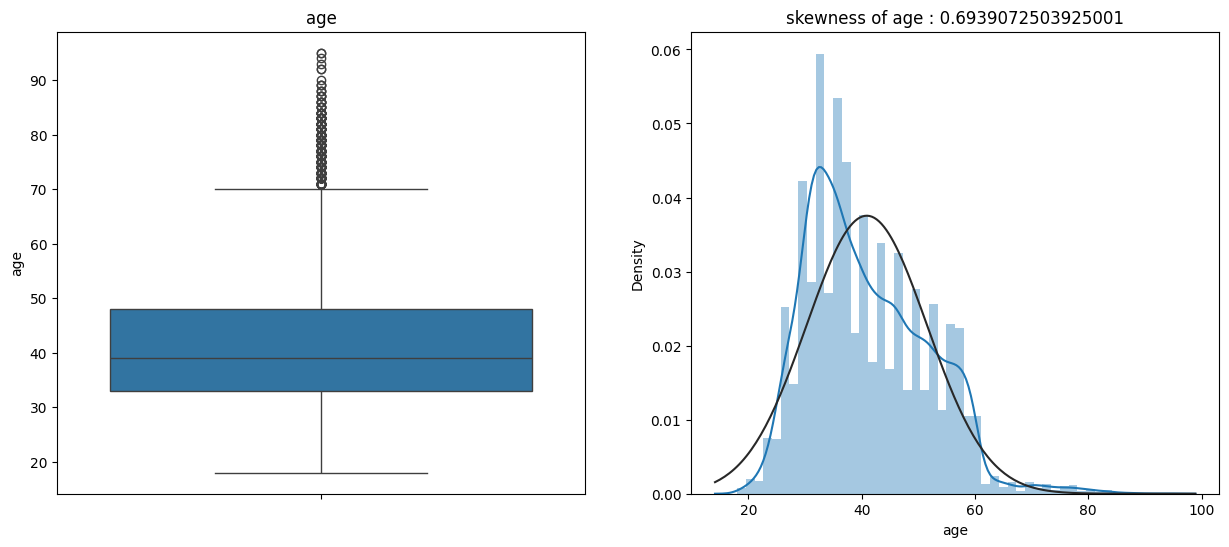

__________________________________________________________________________________________


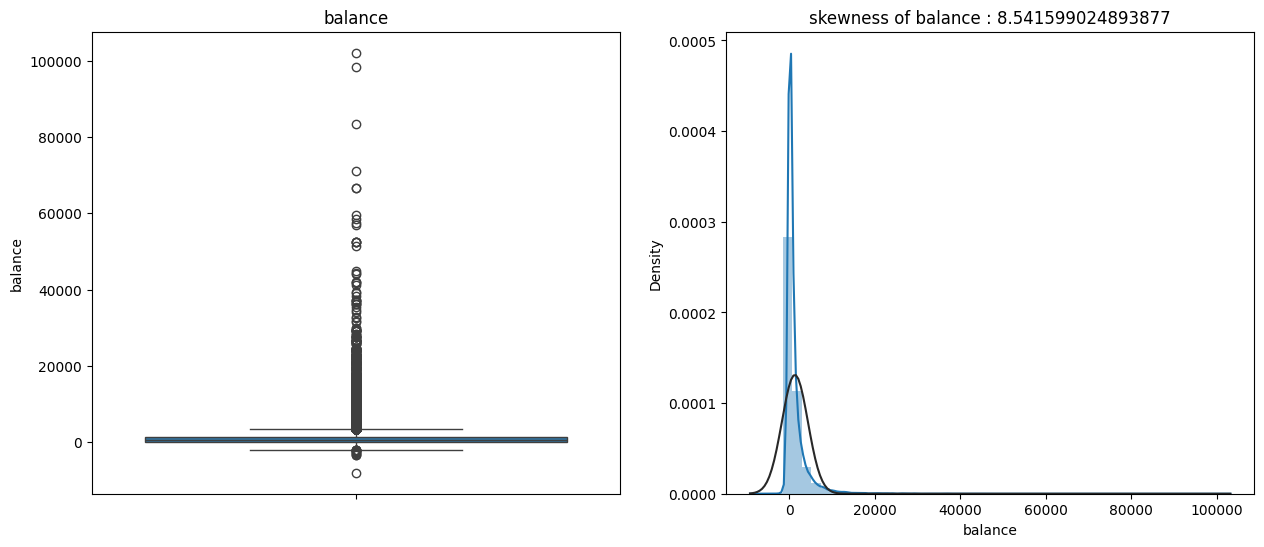

__________________________________________________________________________________________


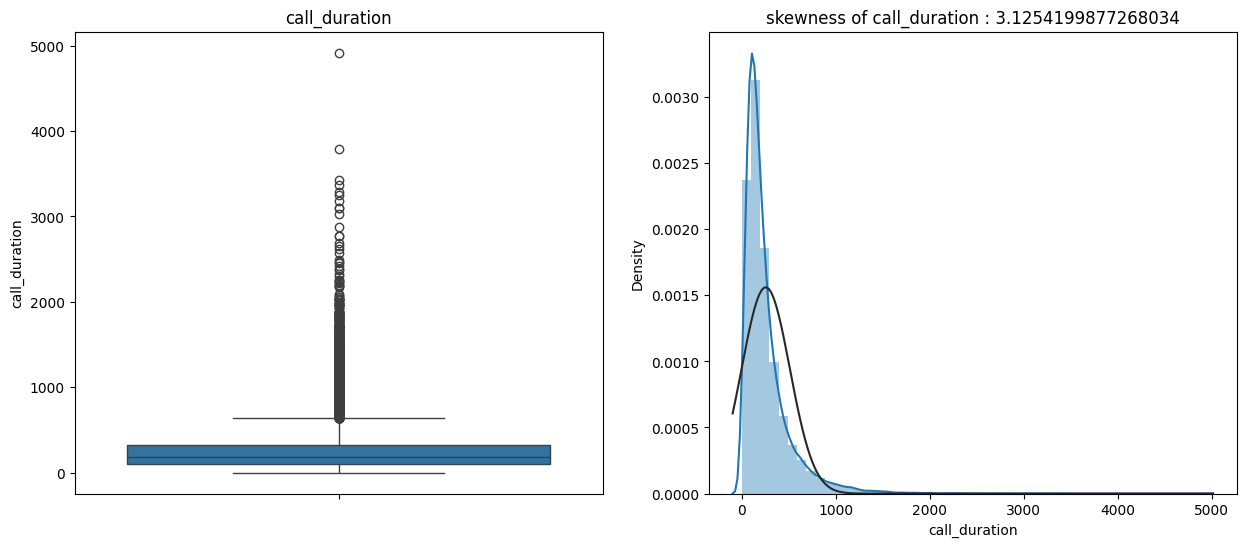

__________________________________________________________________________________________


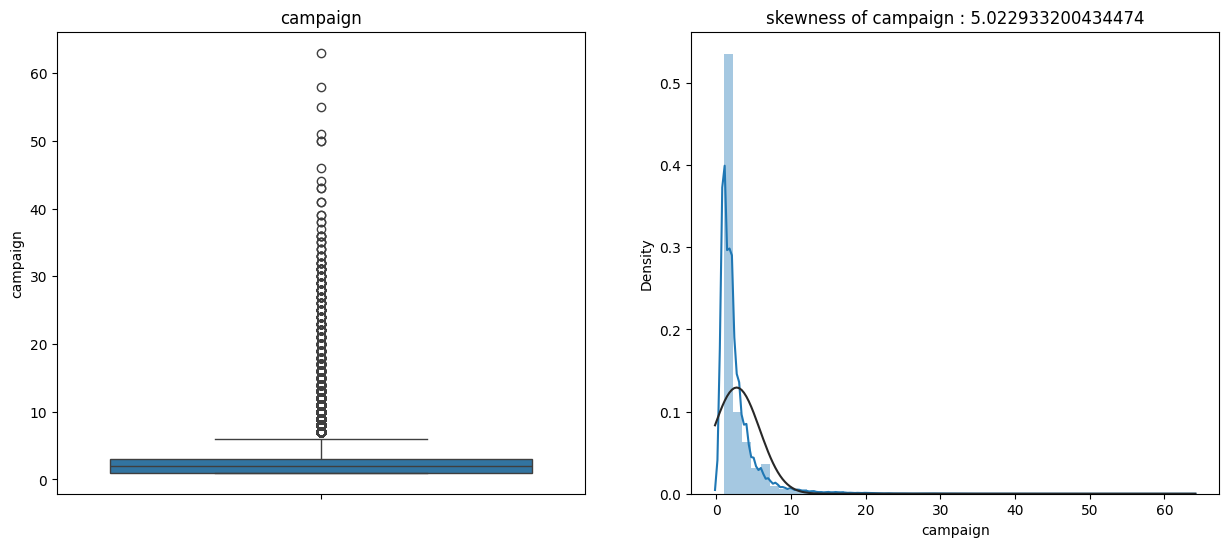

__________________________________________________________________________________________


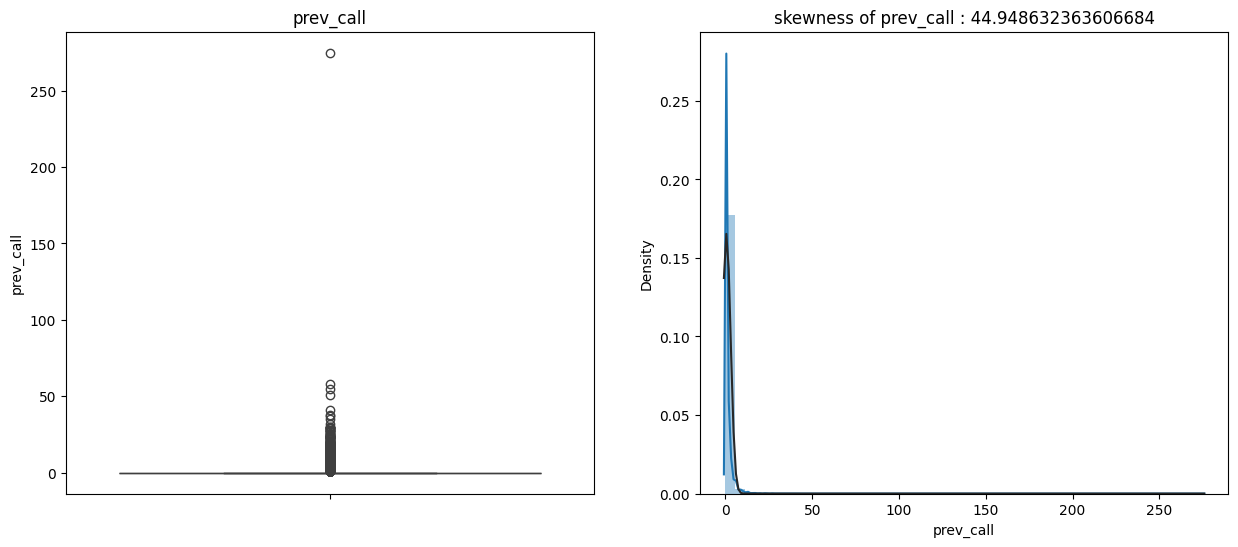

In [ ]:
# 숫자형 데이터에서 박스플롯 사용한 이상치 확인
from scipy.stats import norm

# 각 속성에 대해 박스플롯 및 분포도 생성
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- age, balance, call_duration, campaign, prev_call 은 이상치가 있음
- prev_call은 매우 좁은 범위에 집중되어 있기 때문에 속성제거

In [ ]:
# 분위수 범위를 통한 이상치 제거

# prev_call 제외한 이상치를 가진 속성 선택
outlier_var=['age', 'balance', 'call_duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # 이상치를 upper_limit 또는 lower_limit 값으로 조정
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


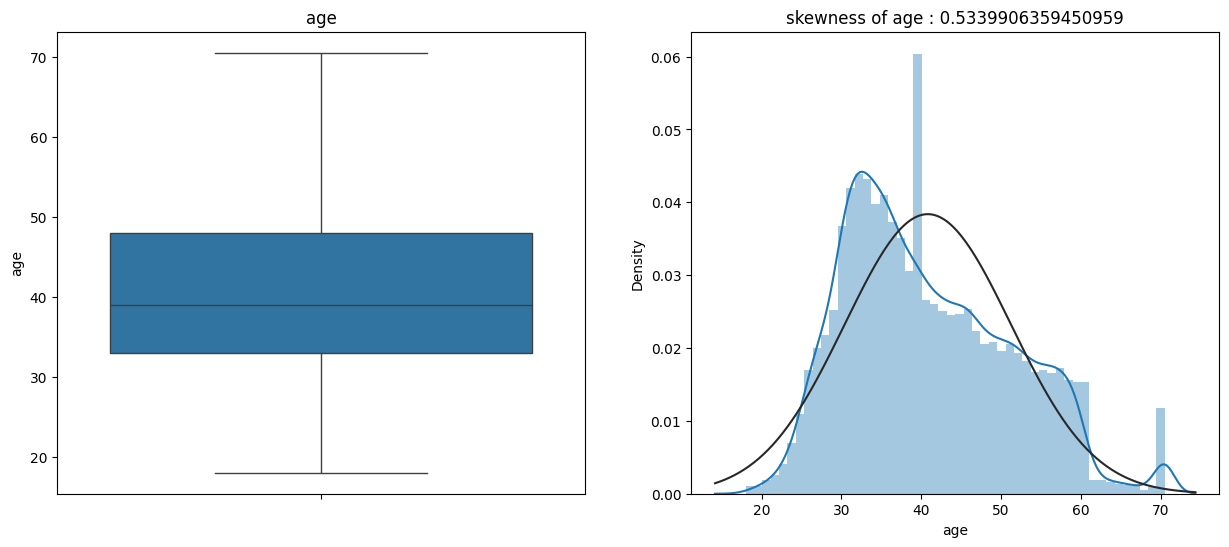

__________________________________________________________________________________________


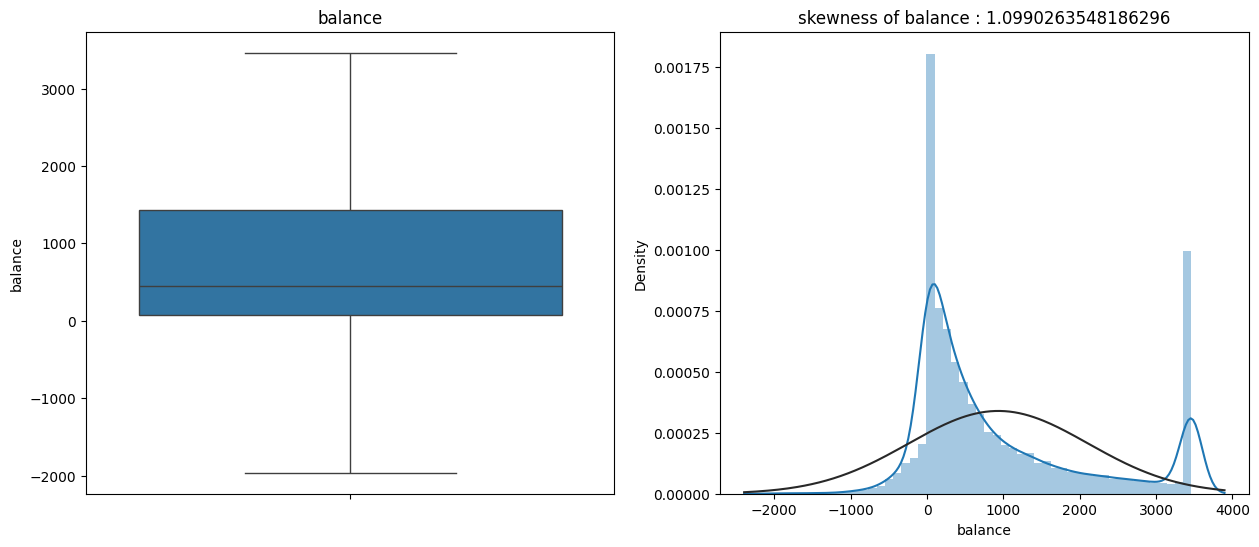

__________________________________________________________________________________________


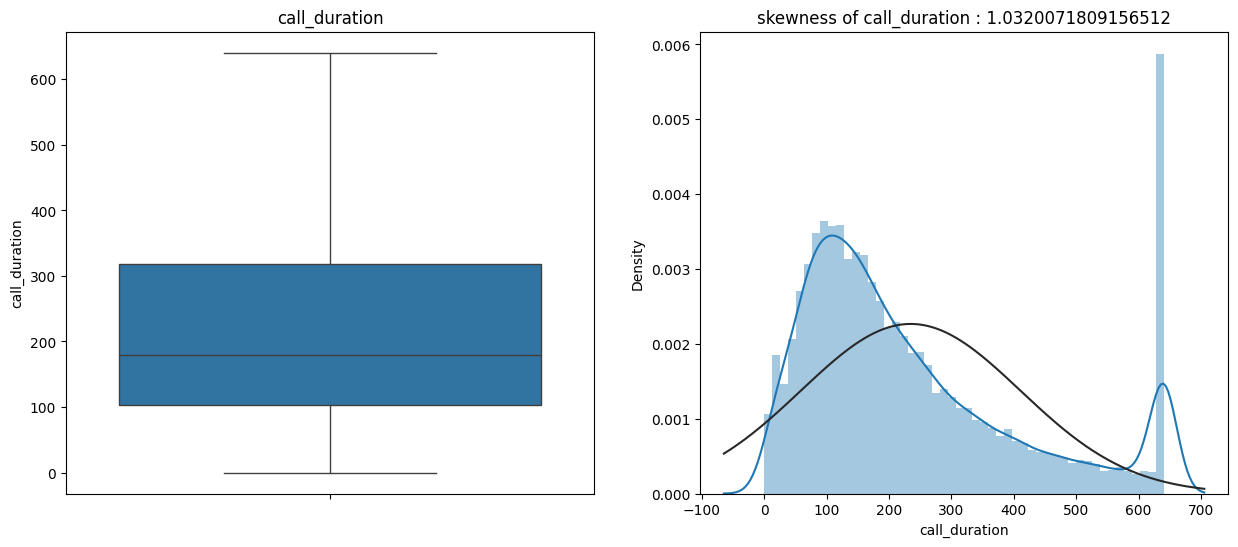

__________________________________________________________________________________________


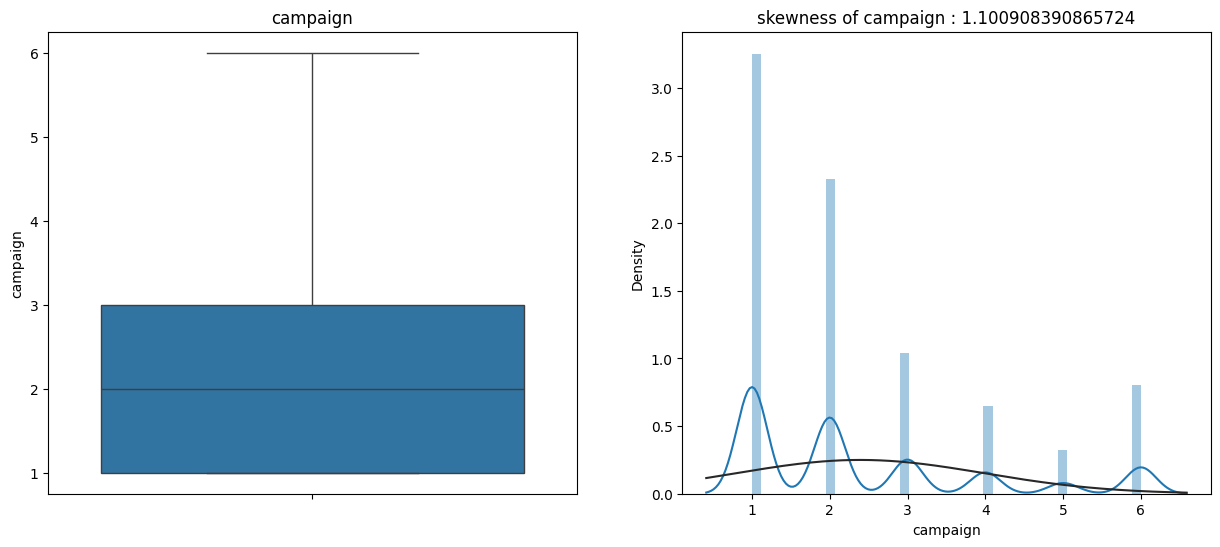

In [ ]:
# 이상치 처리 검증

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- 이상치가 성공적으로 제거됨

.

#### **<u>[3] 범주형 자료 인코딩</u>**

In [ ]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'범주형 변수들 : {list(categorical_variables)}')

범주형 변수들 : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'target']


In [ ]:
# describe 결과에서 unique 행만 추출하고 전치(transpose)
unique_summary = df[categorical_variables].describe(include='all').loc[['unique']].T

# 인덱스 초기화하고 보기 좋게
unique_summary.reset_index(inplace=True)
unique_summary.columns = ['속성', 'unique 개수']

# 출력
unique_summary


,속성,unique 개수
0,job,11
1,marital,3
2,education,3
3,default,2
4,housing,2
5,loan,2
6,target,2


**<u>관찰 결과 :</u>**
- job은 범주가 너무 다양해서 OneHot 인코딩 사용
- 나머지 범주형 변수들은 라벨 인코딩 사용

In [ ]:
## 라벨 인코딩

df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['target'] = df['target'].map({'yes':1,'no':0})

In [ ]:
## job 변수는 OneHot 인코딩
df = pd.get_dummies(df, columns=['job'], prefix=["job"], drop_first=True, dtype=bool)

In [ ]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                36000 non-null  float64
 1   marital            36000 non-null  int64  
 2   education          36000 non-null  int64  
 3   default            36000 non-null  int64  
 4   balance            36000 non-null  float64
 5   housing            36000 non-null  int64  
 6   loan               36000 non-null  int64  
 7   call_duration      36000 non-null  float64
 8   campaign           36000 non-null  int64  
 9   prev_call          36000 non-null  int64  
 10  target             36000 non-null  int64  
 11  job_blue-collar    36000 non-null  bool   
 12  job_entrepreneur   36000 non-null  bool   
 13  job_housemaid      36000 non-null  bool   
 14  job_management     36000 non-null  bool   
 15  job_retired        36000 non-null  bool   
 16  job_self-employed  360

In [ ]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

,age,marital,education,default,balance,housing,loan,call_duration,campaign,prev_call,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,40.0,1,0,0,580.000,1,0,192.0,1,0,0,True,False,False,False,False,False,False,False,False,False
1,47.0,0,0,0,3462.625,0,0,83.0,2,0,0,False,False,False,False,False,False,True,False,False,False
2,25.0,0,1,0,536.000,1,0,226.0,1,0,0,False,False,False,False,False,False,False,True,False,False
3,42.0,1,1,0,1773.000,0,0,311.0,1,1,0,False,False,False,True,False,False,False,False,False,False
4,56.0,1,1,0,217.000,0,1,121.0,2,0,0,False,False,False,True,False,False,False,False,False,False


.

#### **<u>[4] 독립변수 및 종속변수 분리</u>**

In [ ]:
# 종속변수 선택
dependent_variable = 'target'

# 종속변수를 제외한 모든 변수가 독립변수
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# 독립변수 데이터 생성
X = df[independent_variables].copy()
# 종속변수 데이터 생성
y = df[dependent_variable].copy()

.

#### **<u>[5] 데이터 정규화</u>**

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

Minmax scaling 사용

In [ ]:
# Checking values of splitted dataset after normalisation
X[0:5]

,campaign,job_services,job_entrepreneur,marital,job_student,age,loan,balance,call_duration,job_blue-collar,housing,education,job_housemaid,default,job_self-employed,job_unemployed,job_management,job_technician,prev_call,job_retired
0,1,False,False,1,False,40.0,0,580.000,192.0,True,1,0,False,0,False,False,False,False,0,False
1,2,True,False,0,False,47.0,0,3462.625,83.0,False,0,0,False,0,False,False,False,False,0,False
2,1,False,False,0,True,25.0,0,536.000,226.0,False,1,1,False,0,False,False,False,False,0,False
3,1,False,False,1,False,42.0,0,1773.000,311.0,False,0,1,False,0,False,False,True,False,1,False
4,2,False,False,1,False,56.0,1,217.000,121.0,False,0,1,False,0,False,False,True,False,0,False


.

#### **<u>[6] 데이터 불균형 해소</u>**

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

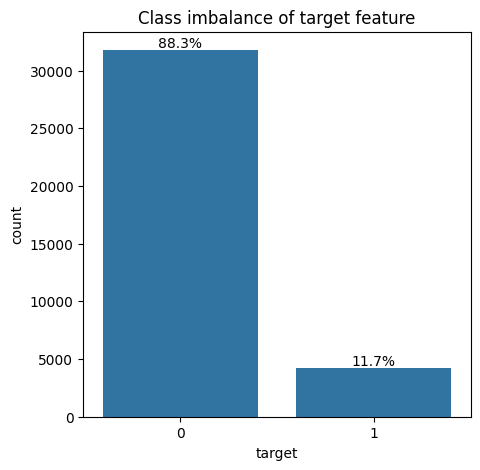

In [ ]:
# 데이터 불균형 시각화
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['target'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

- target이 yes인 사람의 비율이 no인 사람보다 훨신 적음

In [ ]:
# Synthetic Minority Oversampling Technique (SMOTE) 를 사용한 데이터 불균형 해소

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

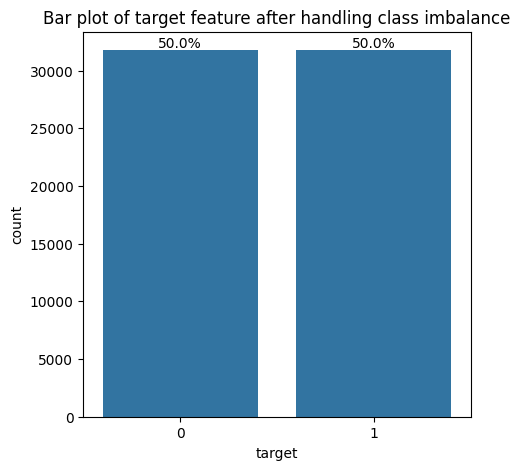

In [ ]:
# 데이터 균형 검증
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
annot_percent(plot)
plt.show()

- SMOTE를 사용한 데이터 불균형 해소 완료

.

#### **<u>[7] 데이터 Test / Train 분리</u>**

In [ ]:
# Train / Test 로 데이터 분리
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
# 분리 결과 확인
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (50862, 20)
Shape of X_test : (12716, 20)
Shape of y_train : (50862,)
Shape of y_test : (12716,)


- 8:2 비율로 Train / Test 분리하였음

In [ ]:
# Checking values of splitted dataset
X_train[0:3]

,campaign,job_services,job_entrepreneur,marital,job_student,age,loan,balance,call_duration,job_blue-collar,housing,education,job_housemaid,default,job_self-employed,job_unemployed,job_management,job_technician,prev_call,job_retired
19949,5,False,False,1,False,45.0,0,1388.0,515.0,False,0,1,False,0,False,False,True,False,0,False
31104,6,False,False,1,False,43.0,0,177.0,9.0,False,0,1,False,0,False,False,True,False,0,False
27291,6,False,False,1,False,34.0,0,-191.0,156.0,False,1,0,False,0,False,False,False,False,0,False


In [ ]:
# Checking values of splitted dataset
X_test[0:3]

,campaign,job_services,job_entrepreneur,marital,job_student,age,loan,balance,call_duration,job_blue-collar,housing,education,job_housemaid,default,job_self-employed,job_unemployed,job_management,job_technician,prev_call,job_retired
25997,3,False,False,1,False,33.000000,1,870.000000,545.000000,True,0,1,False,0,False,False,False,False,0,False
50366,5,False,False,1,False,30.641406,0,423.484856,573.272716,True,1,0,False,0,True,False,False,False,0,False
54570,3,False,False,1,False,55.931980,0,3462.625000,624.813604,True,0,1,False,0,False,False,False,False,0,False


.

## **<u>AI 모델 설계</u>**

In [ ]:
# 분류 알고리즘을 학습시키고 평가 및 시각화하는 함수 정의 (train-test split 기반)

# 평가 지표 import
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# 함수 정의
def classification_model(X_train, X_test, y_train, y_test, clf):
    """
    학습 데이터를 사용해 알고리즘을 학습시키고, 모델을 평가하며, 평가 지표를 시각화하는 함수
    """
    ## 학습 데이터셋으로 모델 학습
    model=clf.fit(X_train, y_train)
    print(model)
    print('=='*45)

    ## 예측 수행
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## 모델 평가
    print('학습 데이터셋 평가 결과:\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("혼동 행렬(Confusion Matrix): \n", cm_train)
    print("정확도(Accuracy): ", accuracy_train)
    print("정밀도(Precision): ", precision_train)
    print("재현율(Recall): ", recall_train)
    print("F1 점수(F1 Score): ", f1_train)
    print("ROC AUC 점수: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('테스트 데이터셋 평가 결과:\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("혼동 행렬(Confusion Matrix): \n", cm_test)
    print("정확도(Accuracy): ", accuracy_test)
    print("정밀도(Precision): ", precision_test)
    print("재현율(Recall): ", recall_test)
    print("F1 점수(F1 Score): ", f1_test)
    print("ROC AUC 점수: ", roc_auc_score_test)
    print('=='*45)

    ## 평가 지표 시각화
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('학습 데이터셋의 혼동 행렬')
    ax1.set_ylabel('실제 레이블')
    ax1.set_xlabel('예측 레이블')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('테스트 데이터셋의 혼동 행렬')
    ax2.set_ylabel('실제 레이블')
    ax2.set_xlabel('예측 레이블')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('학습 데이터셋의 평가 지표')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('테스트 데이터셋의 평가 지표')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}


In [ ]:
# GridSearchCV를 사용하여 분류 알고리즘을 학습하고 평가 및 시각화하는 함수 정의

# 필요한 라이브러리 import
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# 함수 정의
def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    """
    GridSearchCV를 사용하여 학습 데이터셋에 알고리즘을 학습시키고, 모델을 평가하며, 평가 지표를 시각화하는 함수
    """
    ## 학습 데이터셋에 모델을 학습시킴
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model)
    print('=='*45)

    # 최적의 파라미터와 최고 점수 출력
    print("최적의 파라미터:", model.best_params_)
    print("최고 교차검증 정확도:", model.best_score_)
    print('=='*45)

    ## 예측 수행
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## 모델 평가
    print('학습 데이터셋 평가 결과:\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("혼동 행렬:\n", cm_train)
    print("정확도:", accuracy_train)
    print("정밀도:", precision_train)
    print("재현율:", recall_train)
    print("F1 점수:", f1_train)
    print("ROC AUC 점수:", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('테스트 데이터셋 평가 결과:\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("혼동 행렬:\n", cm_test)
    print("정확도:", accuracy_test)
    print("정밀도:", precision_test)
    print("재현율:", recall_test)
    print("F1 점수:", f1_test)
    print("ROC AUC 점수:", roc_auc_score_test)
    print('=='*45)

    ## 평가 지표 시각화
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('학습 데이터셋의 혼동 행렬')
    ax1.set_ylabel('실제 레이블')
    ax1.set_xlabel('예측 레이블')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('테스트 데이터셋의 혼동 행렬')
    ax2.set_ylabel('실제 레이블')
    ax2.set_xlabel('예측 레이블')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('학습 데이터셋의 평가 지표')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('테스트 데이터셋의 평가 지표')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}


In [ ]:
# ROC 커브를 그리는 함수 정의
def plot_roc_curve(y_test, y_pred):
    """
    ROC 커브를 그리는 함수
    """
    # 거짓 양성 비율(FPR)과 참 양성 비율(TPR) 리스트 생성
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # 곡선 아래 면적(AUC) 계산
    roc_auc = auc(fpr, tpr)
    # ROC 커브 플롯
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # 그래프 라벨 지정
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('수신자 조작 특성 곡선 (ROC Curve)')
    plt.legend(loc="lower right")
    # 그래프 출력
    plt.show()


.

### **[1] 인공신경망**

#### **<u>인공신경망 모델 설계 및 하이퍼파라미터</u>**

하이퍼 파라미터 설명
- input_dim : 입력 데이터의 변수 개수
- units : 각 층의 뉴런(노드) 개수
- kernel_initializer : 가중치 초기화 방법
- kernel_regularizer : 가중치 규제 방식 (과적합 방지)
- activation : 활성화 함수
- optimizer : 최적화 알고리즘
- learning_rate : 학습률 (가중치 업데이트 크기)
- loss : 손실 함수 (모델 성능 평가 기준)
- metrics : 학습 평가 지표
- batch_size : 한 번에 학습하는 샘플 수
- epochs : 전체 학습 데이터 반복 횟수

하이퍼 파라미터 세팅
- input_dim = 20
- units = 51
- kernel_initializer = 'normal'
- kernel_regularizer = regularizers.l2(0.001)
- activation = 'relu' (은닉층), 'sigmoid' (출력층)
- optimizer = 'adam'
- learning_rate = 0.001
- loss = 'binary_crossentropy'
- metrics = ['accuracy']
- batch_size = 10
- epochs = 20

In [ ]:
## 인공신경망(ANN) 모델 구성


# 필요한 라이브러리 임포트
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# 인공신경망 모델 초기화
classifier = Sequential()

# 입력층과 첫 번째 은닉층 추가
classifier.add(Dense(units = 51, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_dim = 20))

# 두 번째 은닉층 추가
classifier.add(Dense(units = 51,kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))

# 출력층 추가 (이진 분류용)
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# 모델 학습 수행
adam = Adam(learning_rate=0.001)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# 모델 학습 수행
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7368 - loss: 0.6244
Epoch 2/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8244 - loss: 0.4291
Epoch 3/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8368 - loss: 0.4070
Epoch 4/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8398 - loss: 0.4016
Epoch 5/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8444 - loss: 0.3925
Epoch 6/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8462 - loss: 0.3897
Epoch 7/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8398 - loss: 0.3972
Epoch 8/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8486 - loss: 0.3858
Epoch 9/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8468 - loss: 0.3911
Epoch 10/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8444 - loss: 0.3924
Epoch 11/20
5087/5087 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8475 - loss: 0.3853
Epoch 12/20
5087/50

1590/1590 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
__________________________________________________________________________________________
Training set evaluation result for ANN :

Confusion Matrix: 
 [[23107  2370]
 [ 5886 19499]]
Accuracy:  0.8376784239707443
Precision:  0.8916274178060268
Recall:  0.7681307858971834
F1 Score:  0.8252846319888263
roc_auc_score:  0.8375528522255867

-------------------------------

Test set evaluation result for ANN :

Confusion Matrix: 
 [[5689  623]
 [1468 4936]]
Accuracy:  0.8355614973262032
Precision:  0.8879294837200935
Recall:  0.7707682698313554
F1 Score:  0.8252110674579954
roc_auc_score:  0.8360336913161847


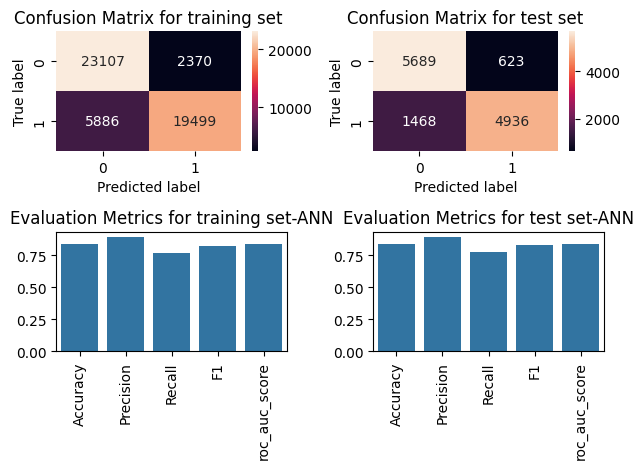

In [ ]:
## 예측 수행
y_train_predict = classifier.predict(X_train)
y_train_pred = (y_train_predict > 0.5)

y_test_predict = classifier.predict(X_test)
y_test_pred = (y_test_predict > 0.5)
print('__'*45)

## 모델 평가
print('Training set evaluation result for ANN :\n')
cm_train_ann = confusion_matrix(y_train, y_train_pred)
accuracy_train_ann = accuracy_score(y_train, y_train_pred)
precision_train_ann = precision_score(y_train, y_train_pred)
recall_train_ann = recall_score(y_train, y_train_pred)
f1_train_ann = f1_score(y_train, y_train_pred)
roc_auc_score_train_ann = roc_auc_score(y_train, y_train_pred)
print("Confusion Matrix: \n", cm_train_ann)
print("Accuracy: ", accuracy_train_ann)
print("Precision: ", precision_train_ann)
print("Recall: ", recall_train_ann)
print("F1 Score: ", f1_train_ann)
print("roc_auc_score: ", roc_auc_score_train_ann)
print('\n-------------------------------\n')
print('Test set evaluation result for ANN :\n')
cm_test_ann = confusion_matrix(y_test, y_test_pred)
accuracy_test_ann = accuracy_score(y_test, y_test_pred)
precision_test_ann = precision_score(y_test, y_test_pred)
recall_test_ann = recall_score(y_test, y_test_pred)
f1_test_ann = f1_score(y_test, y_test_pred)
roc_auc_score_test_ann=roc_auc_score(y_test, y_test_pred)
print("Confusion Matrix: \n", cm_test_ann)
print("Accuracy: ", accuracy_test_ann)
print("Precision: ", precision_test_ann)
print("Recall: ", recall_test_ann)
print("F1 Score: ", f1_test_ann)
print("roc_auc_score: ", roc_auc_score_test_ann)
print('=='*45)

## 평가 지표 시각화
fig,axes = plt.subplots(nrows=2, ncols=2)
ax1 = sns.heatmap(cm_train_ann, annot=True, ax=axes[0,0], fmt='d')
ax1.set_title('Confusion Matrix for training set')
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')
ax2 = sns.heatmap(cm_test_ann, annot=True, ax=axes[0,1], fmt='d')
ax2.set_title('Confusion Matrix for test set')
ax2.set_ylabel('True label')
ax2.set_xlabel('Predicted label')
ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train_ann, precision_train_ann, recall_train_ann, f1_train_ann, roc_auc_score_train_ann], ax=axes[1,0])
ax3.set_title('Evaluation Metrics for training set-ANN')
ax3.tick_params(axis='x', rotation=90)
ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test_ann, precision_test_ann, recall_test_ann, f1_test_ann, roc_auc_score_test_ann], ax=axes[1,1])
ax4.set_title('Evaluation Metrics for test set-ANN')
ax4.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
print('=='*45)

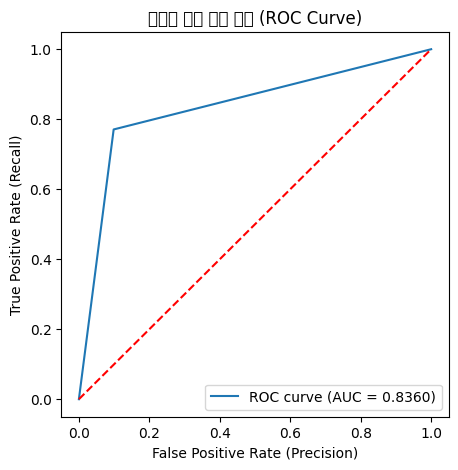

In [ ]:
# Plot ROC curve for ANN
plot_roc_curve(y_test, y_test_pred)

#### **<u>인공신경망 train_test_split 평가 지표 비교</u>**

+----+----------------------+----------+
|    | Evaluation Metrics   |   Result |
+====+======================+==========+
|  0 | Accuracy             | 0.835561 |
+----+----------------------+----------+
|  1 | Precision            | 0.887929 |
+----+----------------------+----------+
|  2 | Recall               | 0.770768 |
+----+----------------------+----------+
|  3 | F1-score             | 0.825211 |
+----+----------------------+----------+
|  4 | roc_auc_score        | 0.836034 |
+----+----------------------+----------+




<Figure size 700x700 with 0 Axes>

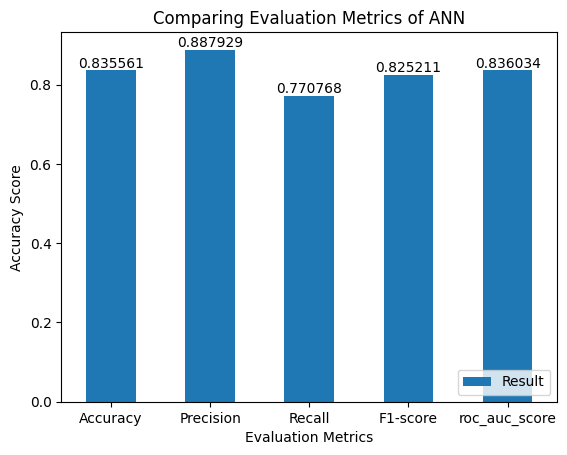

In [ ]:
# ANN 모델의 train_test_split 평가 지표 비교

import pandas as pd
import matplotlib.pyplot as plt

# 평가 지표 목록
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
ev_result = [accuracy_test_ann, precision_test_ann, recall_test_ann, f1_test_ann, roc_auc_score_test_ann]

# 데이터프레임 생성
ann_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
# 데이터프레임 출력
print('=='*45)
print(tabulate(ann_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# 막대 그래프 생성
plt.figure(figsize=(7,7))
ax=ann_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# 제목 및 라벨 설정
ax.set_title("Comparing Evaluation Metrics of ANN")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.bar_label(ax.containers[0])
ax.legend(loc="lower right")

# 그래프 출력
plt.show()

print('=='*45)

**<u>ANN 결과</u> :**
- 0.81의 F1-score가 나타난것을 확인하였음

.

### **[2] XGBoost**

#### **<u>초기 하이퍼파라미터 및 기본 학습 코드</u>**

XGBoost의 유효한 하이퍼 파라미터 :

- n_estimators :	생성할 트리의 개수 (전체 boosting round 수). 클수록 성능이 좋아질 수 있지만, 과적합 위험이 증가함.
- max_depth :	각 결정 트리의 최대 깊이. 깊을수록 복잡한 모델이 되며, 과적합 가능성이 커짐.
min_samples_split :	노드를 분할하기 위해 필요한 최소 샘플 수. 클수록 트리가 보수적으로 생성됨. (※ XGBoost에서는 정확히 같은 이름 대신 min_child_weight 사용)
- min_samples_leaf :	리프 노드가 되기 위해 필요한 최소 샘플 수. 값이 클수록 트리가 덜 복잡해짐.
- max_leaf_nodes	: 하나의 트리에서 생성 가능한 최대 리프 노드 수. 트리의 복잡도를 제어하는 데 사용됨.
- random_state : 재현 가능성을 위한 시드값. 결과를 일관되게 유지하는 데 사용됨.

두가지 하이퍼파라미터를 세팅후 초기 학습 세팅:
- max_leaf_nodes=10
- random_state=0

In [ ]:
# Gradient Boosting Machine 알고리즘을 환경에 import
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Machine 모델을 학습 데이터에 학습시킴
classifier_gbm = GradientBoostingClassifier(max_leaf_nodes=10, random_state=0)

GradientBoostingClassifier(max_leaf_nodes=10, random_state=0)
학습 데이터셋 평가 결과:

혼동 행렬(Confusion Matrix): 
 [[22086  3391]
 [ 2449 22936]]
정확도(Accuracy):  0.8851795053281428
정밀도(Precision):  0.8711968701333233
재현율(Recall):  0.9035257041559976
F1 점수(F1 Score):  0.8870668316831684
ROC AUC 점수:  0.8852126303093447

-------------------------------

테스트 데이터셋 평가 결과:

혼동 행렬(Confusion Matrix): 
 [[5427  885]
 [ 598 5806]]
정확도(Accuracy):  0.8833752752437873
정밀도(Precision):  0.8677327753698999
재현율(Recall):  0.9066208619612742
F1 점수(F1 Score):  0.8867506681939672
ROC AUC 점수:  0.8832058682429944


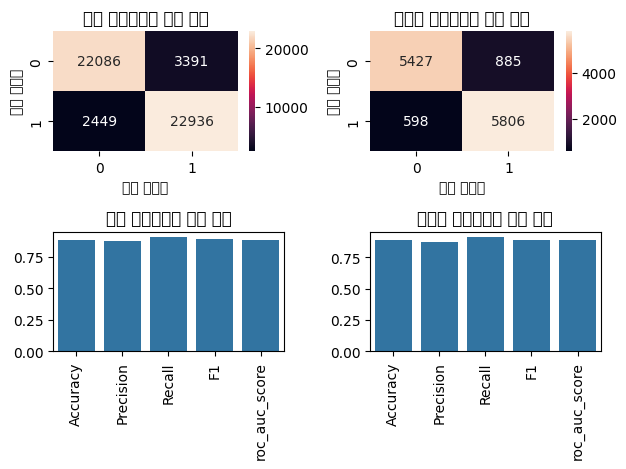

In [ ]:
# XGBoost 알고리즘을 환경에 import
from xgboost import XGBClassifier
# XGBoost 모델을 학습 데이터에 학습시킴
classifier_xgb = XGBClassifier(max_leaf_nodes=10, random_state=0)
xgb = classification_model(X_train, X_test, y_train, y_test, classifier_gbm)

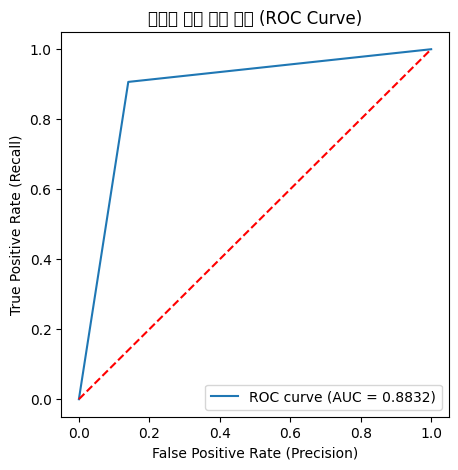

In [ ]:
# XGBoost 분류기의 ROC 커브를 그림
y_pred = xgb['y_test_pred']
plot_roc_curve(y_test, y_pred)

- Training 및 Test의 F1 Score가 각각 0.88 로 나타남
- Cross - Validation을 통한 최적의 하이퍼 파라미터를 찾을 수 있음

.

#### **<u>교차 검증 및 하이퍼파라미터 튜닝</u>**

다음 하이퍼 파라미터에 대한 교차 검증
- n_estimators
- max_depth
- min_samples_split
- min_samples_leaf
총 조합 수는 3 (n_estimators) × 3 (max_depth) × 3 (min_samples_split) × 2 (min_samples_leaf) = 54개 모델을 학습 및 평가

Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaf_nodes=10, max_leaves=None,
                                     min_child_weight=None, missing=nan,
  

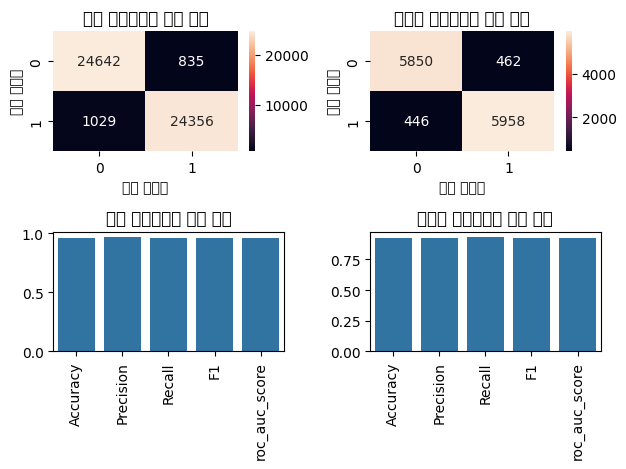

In [ ]:
# XGBoost 알고리즘을 환경에 import
from xgboost import XGBClassifier

## 교차검증을 사용하여 XGBoost 모델을 학습시킴

# 파라미터 딕셔너리 정의
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# XGBoost 분류기 인스턴스 생성
classifier_xgb = XGBClassifier(max_leaf_nodes=10, random_state=0)
# 모델 학습
xgb_cv = classification_CV_model(X_train, X_test, y_train, y_test, classifier_xgb, param_grid)

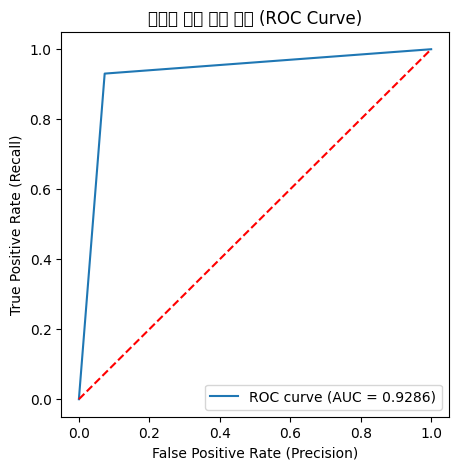

In [ ]:
# XGBoost 분류기의 ROC 커브를 그림
y_pred = xgb_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

- Training 및 Test의 F1 Score가 각각 0.964 및 0.927 로 나타남
- 인공신경망보다 나은 성능을 확인

.

#### **<u>교차 검증을 통한 하이퍼파라미터 튜닝 성능 변화 비교</u>**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.883375 |           0.928594 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.867733 |           0.928037 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.906621 |           0.930356 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.886751 |           0.929195 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.883206 |           0.928581 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

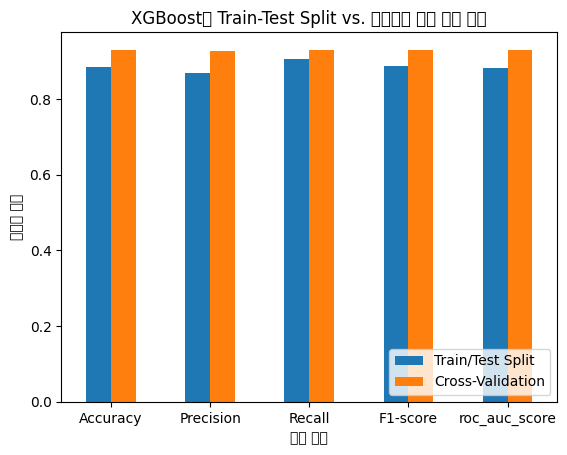

In [ ]:
# XGBoost 모델의 train_test_split과 GridSearchCV 결과 비교

import pandas as pd
import matplotlib.pyplot as plt

# 지표 목록
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [xgb['accuracy_test'], xgb['precision_test'], xgb['recall_test'], xgb['f1_test'], xgb['roc_auc_score_test']]
cross_validation = [xgb_cv['accuracy_test'], xgb_cv['precision_test'], xgb_cv['recall_test'], xgb_cv['f1_test'], xgb_cv['roc_auc_score_test']]

# 데이터프레임 생성
xgb_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                                  'Train/Test Split': train_test_split,
                                  'Cross-Validation': cross_validation})
# 데이터프레임 출력
print('=='*45)
print(tabulate(xgb_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# 막대그래프 생성
plt.figure(figsize=(7,7))
ax = xgb_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# 그래프 제목 및 라벨 설정
ax.set_title("XGBoost의 Train-Test Split vs. 교차검증 평가 지표 비교")
ax.set_xlabel("평가 지표")
ax.set_ylabel("정확도 점수")
ax.legend(loc="lower right")

# 그래프 출력
plt.show()
print('=='*45)

교차 검증과 하이퍼파라미터 조정을 통해 성능 향상을 할 수 있었음

.

.

## **<u>AI 모델 비교</u>**

In [ ]:
# Data: XGBoost와 ANN만 포함
model = ['XGBoost', 'ANN']

Accuracy = [xgb_cv['accuracy_test'], accuracy_test_ann]
Precision = [xgb_cv['precision_test'], precision_test_ann]
Recall = [xgb_cv['recall_test'], recall_test_ann]
F1_score = [xgb_cv['f1_test'], f1_test_ann]
roc_auc_score = [xgb_cv['roc_auc_score_test'], roc_auc_score_test_ann]
confusion_matrix = [xgb_cv['cm_test'], cm_test_ann]

# Create a dataframe
models_evaluation_df = pd.DataFrame({
    'model': model,
    'Accuracy': Accuracy,
    'Precision': Precision,
    'Recall': Recall,
    'F1_score': F1_score,
    'roc_auc_score': roc_auc_score,
    'confusion matrix': confusion_matrix
})

# 결과 출력
models_evaluation_df


,model,Accuracy,Precision,Recall,F1_score,roc_auc_score,confusion matrix
0,XGBoost,0.928594,0.928037,0.930356,0.929195,0.928581,"[[5850, 462], [446, 5958]]"
1,ANN,0.835561,0.887929,0.770768,0.825211,0.836034,"[[5689, 623], [1468, 4936]]"


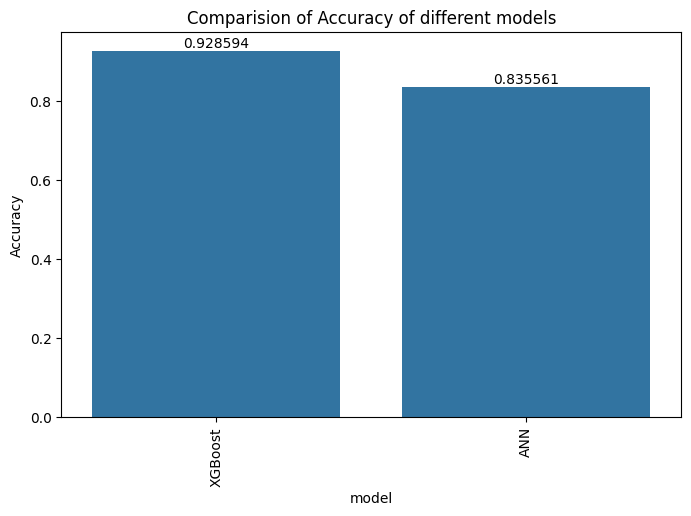

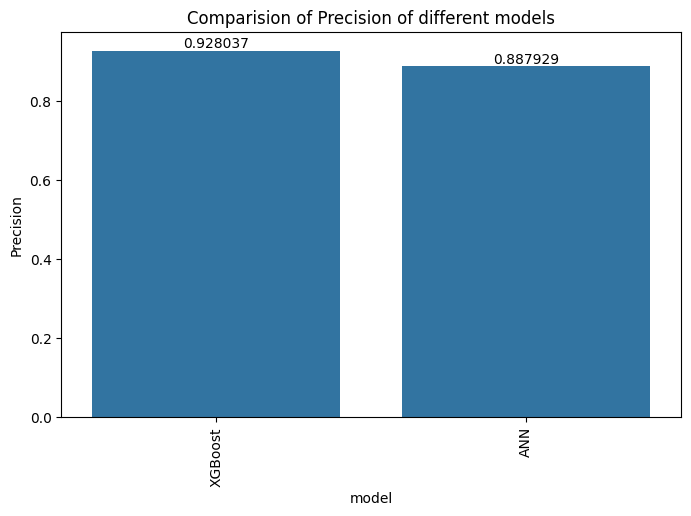

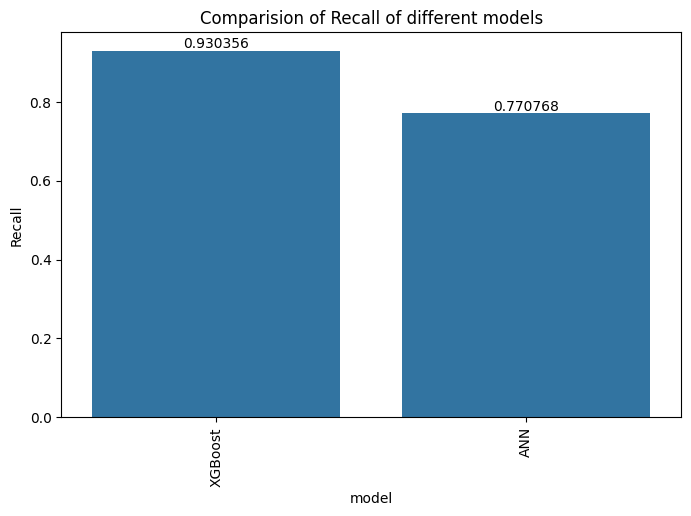

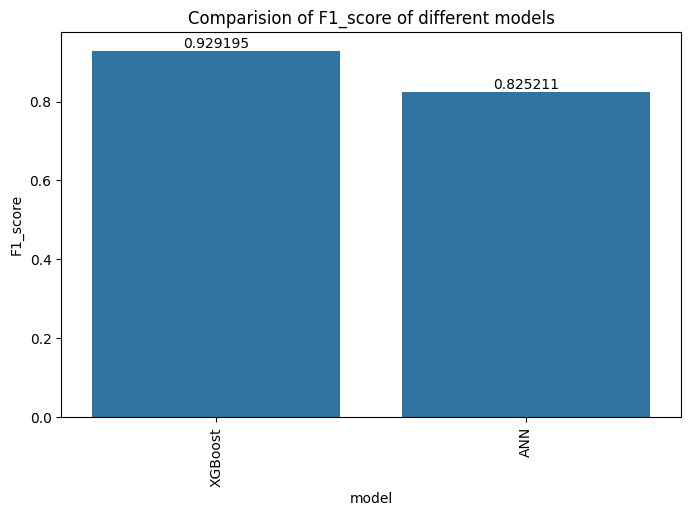

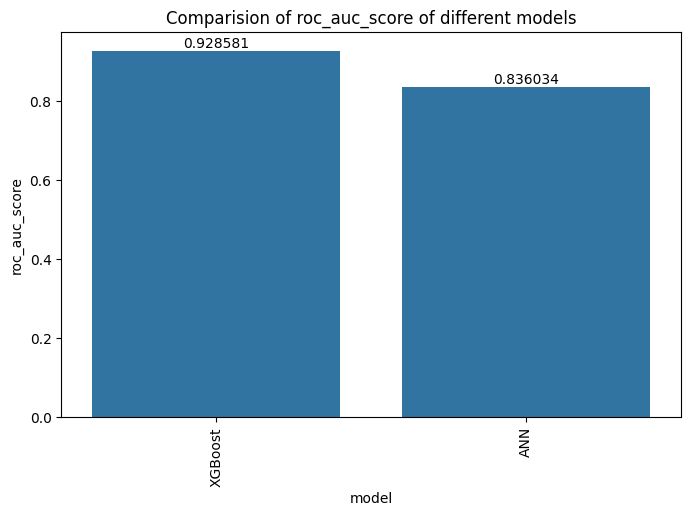

In [ ]:
## 두 AI 모델 결과 시각화
col=[var for var in models_evaluation_df.columns if var not in ['model','confusion matrix']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

XGBoost의 F1_score 가 ANN에 비해 더 나은 성능을 보임을 확인하였다.

.

## **<u>실전 예측</u>**

설계한 AI 모델을 활용하여 실제 데이터를 예측하고자한다.

In [ ]:
# 데이터셋 불러오기
df_prod=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/dataset/marketing_test_without_target.csv", sep =",")

In [ ]:
# unknown 값을 결측치로 간주 (null 로 변경)
df_prod = df_prod.replace('unknown', np.nan)

In [ ]:
# 결측 비율이 50% 초과하는 속성 제거
df_prod.drop(columns='prev_outcome', inplace=True)

# 결측치를 최빈값으로 대체
df_prod['education']=df_prod['education'].fillna(df_prod['education'].mode()[0])
df_prod['job']=df_prod['job'].fillna(df_prod['job'].mode()[0])

In [ ]:
# 분위수 범위를 통한 이상치 제거

# prev_call 제외한 이상치를 가진 속성 선택
outlier_var=['age', 'balance', 'call_duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df_prod[i].quantile(0.25)
    Q3=df_prod[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df_prod[i].quantile(0.25)-1.5*IQR
    upper_limit =df_prod[i].quantile(0.75)+1.5*IQR

    # 이상치를 upper_limit 또는 lower_limit 값으로 조정
    df_prod.loc[(df_prod[i] > upper_limit),i] = upper_limit
    df_prod.loc[(df_prod[i] < lower_limit),i] = lower_limit

In [ ]:
# Addressing categorical variables from the dataset
categorical_variables=df_prod.describe(include=['object']).columns

In [ ]:
## 라벨 인코딩

df_prod['marital'] = df_prod['marital'].map({'single':0,'married':1,'divorced':2})
df_prod['education'] = df_prod['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df_prod['default'] = df_prod['default'].map({'yes':1,'no':0})
df_prod['housing'] = df_prod['housing'].map({'yes':1,'no':0})
df_prod['loan'] = df_prod['loan'].map({'yes':1,'no':0})

In [ ]:
## job 변수는 OneHot 인코딩
df_prod = pd.get_dummies(df_prod, columns=['job'], prefix=["job"], drop_first=True, dtype=bool)

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_prod = scaler.fit_transform(df_prod)

In [ ]:
# 최적 모델 객체 추출 (GridSearchCV 객체 안에서 최적 모델 꺼내기)
best_model = xgb_cv['model'].best_estimator_


# 예측 수행
y_pred_label = best_model.predict(X_prod)
y_pred_proba = best_model.predict_proba(X_prod)[:, 1]

# 예측 결과 저장
df_prod['predicted_label'] = y_pred_label
df_prod['predicted_proba'] = y_pred_proba

In [ ]:
print(df_prod[['predicted_label', 'predicted_proba']].head())

   predicted_label  predicted_proba
0                0         0.001540
1                0         0.009006
2                0         0.028194
3                0         0.078116
4                0         0.003685


각 개체에 대한 target 예측이 수행됨

In [ ]:
# 예측 결과 포함된 데이터프레임을 CSV 파일로 저장
df_prod.to_csv("/content/drive/MyDrive/Colab Notebooks/results/prediction_result.csv",
               index=False, encoding='utf-8-sig')
